# Kibble example
Models my artificer attempting crafting checks Kibble's Crafting System: (https://www.reddit.com/r/UnearthedArcana/comments/rg5y3q/kibbles_crafting_system_a_comprehensive_system_of/).

Uses pandas to put data into dataframes and plotly for viz

In [1]:
# imports
from kibble import Kibble, roll_until_complete
from dice import Dice, Advantage
import pandas as pd
import numpy as np
import plotly.graph_objects as go

Let's try and craft some rings:  
 - Ring of Jumping: 4 x DC 12 Checks  
 - Ring of Resistance: 8 x DC 16 Checks  
 - Ring of Telekinesis: 8 x DC 19 Checks  
 - Ring of Invisibility: 16 x DC 22 Checks

We'll try craft 100 of each and see how many we succeed.

In [2]:
rings = [
    (12,4,"Jumping"), 
    (16,8,"Resistance"), 
    (19,8,"Telekinesis"), 
    (22,16,"Invisibility")
]
n_sims = 1000
print(*rings[1])

16 8 Resistance


 Our dice is a d20 with an +8 modifier.

In [3]:
artificer = Dice(20,8)

## Success Rates of crafting

In [4]:
results = pd.DataFrame(
    {
        "Item":[],
        "Success":[],
        "Rolls":[]
    }
)
for ring in rings:
    for _ in range(n_sims):
        sim_kibble = Kibble( *ring )
        roll_until_complete(sim_kibble, artificer.roll)
        results.loc[len(results)] = {
                "Item":sim_kibble.name,
                 "Success":sim_kibble.is_success(),
                 "Rolls":sim_kibble.n_rolls
            }

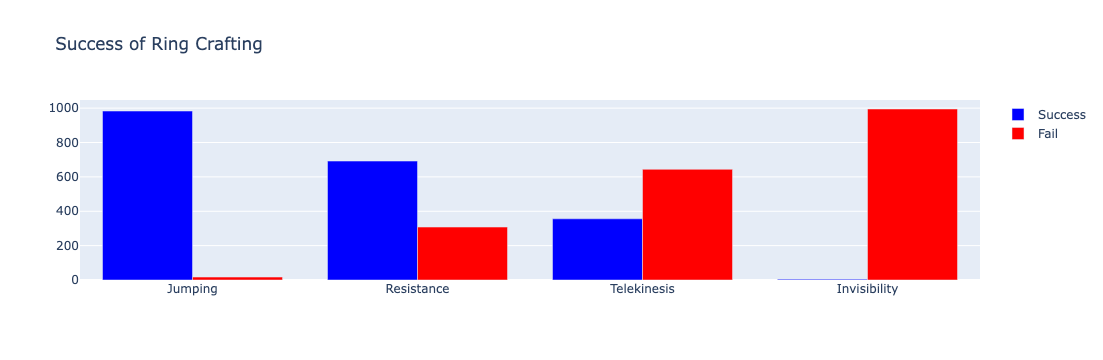

In [5]:
results_success = results.where( results["Success"] ).dropna().filter(items=["Item"]).value_counts().reset_index(name='Count')
results_fail = results.mask( results["Success"] ).dropna().filter(items=["Item"]).value_counts().reset_index(name='Count')

success_bars = go.Figure(data=[
    go.Bar(
        x=results_success["Item"],
        y=results_success["Count"],
        marker_color="Blue",
        name="Success"
    ),
    go.Bar(
        x=results_fail["Item"],
        y=results_fail["Count"],
        marker_color="Red",
        name="Fail"
    )
])
success_bars.update_layout(
    title_text='Success of Ring Crafting'
)

success_bars.show()

Few Invisibility rings succeed. This is when I decided to add the "always_complete" attribute to a Kibble. In an actual sense, this would translate as a player realising they are about to fail the kibble, and making some adjustment to ensure they always succeed that last roll before failure.

Now that we have always_complete, let's visualize some other stuff.

## Rolls to craft
Let's make some histograms to see how many times we're attempting checks to craft these rings, but when we are assured success.

In [6]:
results = pd.DataFrame(
    {
        "Item":[],
        "Rolls":[],
        "Auto Successes":[]
    }
)
for ring in rings:
    for _ in range(n_sims):
        sim_kibble = Kibble( *ring, always_complete=True )
        roll_until_complete(sim_kibble, artificer.roll)
        results.loc[len(results)] = {
                "Item":sim_kibble.name,
                "Rolls":sim_kibble.n_rolls,
                "Auto Successes":sim_kibble.n_auto_successes
            }

In [7]:
results

,Item,Rolls,Auto Successes
0,Jumping,4,0
1,Jumping,5,0
2,Jumping,4,0
3,Jumping,4,0
4,Jumping,5,0
...,...,...,...
3995,Invisibility,29,13
3996,Invisibility,29,3
3997,Invisibility,26,8
3998,Invisibility,23,4
